1) Решить систему линейных алгебраических уравнений   методом Монте-Карло.  
2) Сравнить с решением данного уравнения, полученным в произвольном математическом пакете.  
3) Построить график зависимости точности решения от длины цепи маркова и числа смоделированных цепей маркова.

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.metrics import mean_squared_error 
from numpy.linalg import norm

%matplotlib inline

In [58]:
A = np.array([[0.7, -0.2, 0.3],
             [0.4, 1.3, 0.1],
             [0.2, 0.1, 1.1]])
A

array([[ 0.7, -0.2,  0.3],
       [ 0.4,  1.3,  0.1],
       [ 0.2,  0.1,  1.1]])

In [59]:
f = np.array([3,1,1])
f

array([3, 1, 1])

Equation solution using **numpy.linalg.solve**

In [60]:
python_solution = np.linalg.solve(A,f)
python_solution

array([ 4.0513834 , -0.49407115,  0.2173913 ])

In [61]:
a = np.eye(len(A)) - A
a

array([[ 0.3,  0.2, -0.3],
       [-0.4, -0.3, -0.1],
       [-0.2, -0.1, -0.1]])

In [34]:
#моделируем реализацию цепи Маркова длины N
def count_ksi(N, A, f, h, pi, p):
    #N - длина цепи Маркова
    #pi - вектор начальных вероятностей цепи Маркова
    #p - матрица переходных состояний(вероятностей) цепи Маркова
        
    #цепь Маркова
    i = []
    
    alpha = random.random()

    #index of state that will be implemented
    ind_state = 0
    sum_state = pi[0]
    while alpha >= sum_state:
        ind_state += 1
        sum_state += pi[ind_state]
    i.append(ind_state)
    
    #Веса состояний цепи Маркова
    Q = []

    #Вычисляем веса цепи Маркова
    if(pi[i[0]] > 0):
        Q.append(h[i[0]] / pi[i[0]])
    else: #pi[i[0]] = 0
        Q.append(0)
    
    ksi = Q[0] * f[i[0]]

    for k in range(1, N):
        alpha = random.random()
        
        #index of state that will be implemented
        ind_state = 0
        sum_state = pi[0]
        while alpha >= sum_state:
            ind_state += 1
            sum_state += pi[ind_state]
        i.append(ind_state)
        
        if(pi[i[k]] > 0):
            Q.append(Q[k-1] * a[i[k-1], i[k]] / p[i[k-1]][i[k]])
        else:
            Q.append(0)
 
        ksi += Q[k] * f[i[k]]
    
    return ksi

In [35]:
def linalg_monte_carlo(a, f, N, m):
    #N - длина цепи Маркова
    #m - количество реализаций цепи Маркова
    
    #размерность системы
    n = len(A)
    
    #решение системы
    x = np.zeros(n)
    
    h = np.identity(n)
    
    #вектор начальных вероятностей цепи Маркова
    pi = [1 / n] * n
    
    #матрица переходных состояний(вероятностей) цепи Маркова
    p = [[1 / n] * n for _ in range(n)]

    for j in range(n):
        x[j] = sum(count_ksi(N, a, f, h[:, j], pi, p) for _ in range(m)) / m
        
    print(x)
    
    return x

In [64]:
def mse(x, y):
    assert len(x) == len(y)
    return sum([(x[i] - y[i]) ** 2  for i in range(len(x))])

In [36]:
def plot(x, y, x_label, y_label):
    plt.plot(x, y)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [64]:
NN = [1, 200, 800, 1000, 1500, 2000]
M = [1, 200, 800, 1000, 1500, 2000]

[0. 0. 0.]
[ 4.03150801 -0.31522244  0.13506599]
[ 4.09251417 -0.41218698  0.2144181 ]
[ 3.88276088 -0.38533972  0.16595821]
[ 3.99018229 -0.64352208  0.35737564]
[ 4.0325707  -0.37086396  0.13326957]


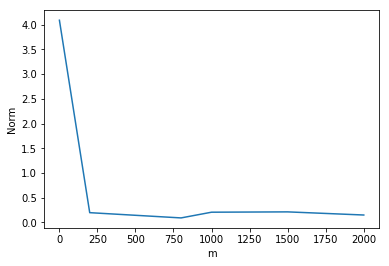

In [62]:
answers_N_fixed = [linalg_monte_carlo(a, f, 2000, i) for i in M]

norm_N_fixed = []

for j in answers_N_fixed:
    norm = .0
    for i in range(3):
        norm += (python_solution[i] - j[i])**2
    norm = sqrt(norm)
    norm_N_fixed.append(norm)

plot(M, norm_N_fixed, "m", "Norm")

[3.0735 1.032  1.011 ]
[ 3.99008936 -0.57483871  0.28671878]
[ 4.04086587 -0.58704641  0.29803731]
[ 3.83587987 -0.40685103  0.09282256]
[ 4.01195006 -0.30070645  0.28491515]
[ 3.87811942 -0.33083878  0.17692899]


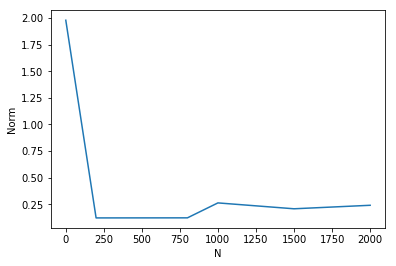

In [65]:
answers_m_fixed = [linalg_monte_carlo(a, f, i, 2000) for i in NN]

norm_m_fixed = []

for j in answers_m_fixed:
    norm = .0
    for i in range(3):
        norm += (python_solution[i] - j[i])**2
    norm = sqrt(norm)
    norm_m_fixed.append(norm)

plot(NN, norm_m_fixed, "N", "Norm")